<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/10_html_selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Webpage Loading and Scrapping

## Sports Worked Today

More often than not, I'll point my request at a page and return very little of the html code.  Let's see an example!

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pa

url = "https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats"

r = requests.get(url)
soup = BeautifulSoup(r.text)

tables = soup.find_all('table')

pa.read_html(str(tables[0]))[0]

Unnamed: 0_level_0 Unnamed: 1_level_0  ... Per 90 Minutes Unnamed: 29_level_0
               Player             Nation  ...        npxG+xA             Matches
0         Hugo Lloris             fr FRA  ...           0.03             Matches
1     Pierre Højbjerg             dk DEN  ...           0.13             Matches
2           Eric Dier            eng ENG  ...           0.09             Matches
3          Harry Kane            eng ENG  ...           0.64             Matches
4       Son Heung-min             kr KOR  ...           0.63             Matches
5     Sergio Reguilón             es ESP  ...           0.31             Matches
6         Lucas Moura             br BRA  ...           0.39             Matches
7        Oliver Skipp            eng ENG  ...           0.07             Matches
8             Emerson             br BRA  ...           0.14             Matches
9    Davinson Sánchez             co COL  ...           0.14             Matches
10         Ben Davies            wls WAL  ...           0.16             Matches
11    Japhet Tanganga            eng ENG  ...           0.09             Matches
12          Dele Alli            eng ENG  ...           0.21             Matches
13    Cristian Romero             ar ARG  ...           0.00             Matches
14        Harry Winks            eng ENG  ...           0.25             Matches
15    Tanguy Ndombele             fr FRA  ...           0.16             Matches
16    Steven Bergwijn             nl NED  ...           0.53             Matches
17   Giovani Lo Celso             ar ARG  ...           0.52             Matches
18     Ryan Sessegnon            eng ENG  ...           0.09             Matches
19       Matt Doherty             ie IRL  ...           0.54             Matches
20              Bryan             es ESP  ...           0.10             Matches
21          Joe Rodon            wls WAL  ...           0.00             Matches
22     Brandon Austin            eng ENG  ...            NaN             Matches
23  Pierluigi Gollini             it ITA  ...            NaN             Matches
24    Dilan Markanday            eng ENG  ...            NaN             Matches
25         Tobi Omole            eng ENG  ...            NaN             Matches
26      Dane Scarlett            eng ENG  ...            NaN             Matches
27     Moussa Sissoko             fr FRA  ...            NaN             Matches
28       Harvey White            eng ENG  ...            NaN             Matches
29        Squad Total                NaN  ...           2.65                 NaN
30     Opponent Total                NaN  ...           1.84                 NaN

[31 rows x 30 columns]

I usually have issues with this site but it worked today.  Great place for all sports data!

## News Source with Javascript


Here is a scrape I did a while back that still has the issues I want to discuss.  I've found the stripped away table from National Public Radio looking at the individuals involved in the attack at the capitol on 1/6/21. 
 https://www.npr.org/2021/02/09/965472049/the-capitol-siege-the-arrested-and-their-stories#database  
 
 The link will take you directly to the table I am insterested in scrapping.  From this page, I found where they reference the table from.  This gets me around parsing through all the extra frames.  It is stored as my `url` below.  Take a look at [it](https://apps.npr.org/dailygraphics/graphics/capitol-riot-table-20210204/table.html).

In [2]:
url = "https://apps.npr.org/dailygraphics/graphics/capitol-riot-table-20210204/table.html"

r = requests.get(url)
soup = BeautifulSoup(r.text)

soup.find_all('table')

[]

<iframe src="https://apps.npr.org/dailygraphics/graphics/capitol-riot-table-20210204/table.html?initialWidth=1238&amp;childId=responsive-embed-capitol-riot-table-20210204-table&amp;parentTitle=Explore%20NPR%20database%20of%20Jan.%206%20Capitol%20riot%20cases%20and%20sentencing%20status%20updates%20%3A%20NPR&amp;parentUrl=https%3A%2F%2Fwww.npr.org%2F2021%2F02%2F09%2F965472049%2Fthe-capitol-siege-the-arrested-and-their-stories" scrolling="no" marginheight="0" width="100%" height="119791px" frameborder="0"></iframe>

Looking at the developer tools there is clearly a table called, 'riot-table' but I get nothing on this call!  Not even any tables!

This is where the big guns come in!  The code below was taken from https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/Web%20Scraping%20Tutorial.ipynb it will install the packages we need to execute the scrape of the data.  The `chromium` is the Google chrome browser.  That is how we will go to the websites via the code.  `selenium` is the big tool.  It will allow us to interact on webpage and with the javascript.  Essentially the machine is opening a browser page and going to the website with the browser open!




In [3]:
# RUN THIS CELL WHEN USING THE NOTEBOOK ON COLAB - NO PREVIOUS INSTALLATION OF SELENIUM IS NEEDED
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

Now with all that done, I use the `driver` to go to the exact same website and voila we have the table!

In [4]:

driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')
tables = soup.find_all('table')
#tables
pa.read_html(str(tables[0]))[0]

,Name,Summary,Charges,Case Updates
0,Stefanie Nicole Chiguer New 36 years old Dracu...,Stefanie Nicole Chiguer came to the attention ...,Federal: Entering and Remaining in a Restricte...,NaN
1,"Alan Fischer New 27 years old Tampa, Florida","According to court documents, Alan Fischer III...","Federal: Assaulting, Resisting, or Impeding Ce...",NaN
2,"Juliano Gross New 28 years old Kearny, New Jersey",The FBI alleges that Juliano Gross documented ...,Federal: Knowingly Entering or Remaining in an...,NaN
3,"Kirstyn Niemela New 33 years old Hudson, New H...","“The whole nation will watch it happen,” Kirst...",Federal: Entering and Remaining in a Restricte...,NaN
4,"Jeffrey Schaefer New 35 years old Milton, Dela...",Law enforcement claimed in a court filing that...,Federal: Entering and Remaining in a Restricte...,NaN
...,...,...,...,...
743,"Kyle James Young 37 years old Redfield, Iowa",Federal prosecutors accused Kyle Young of assa...,Federal: Obstruction of an Official Proceeding...,Young pleaded Not Guilty to all charges
744,"Philip S. Young 59 years old Sewell, New Jersey",Philip Young allegedly pushed a barricade into...,"Federal: Assaulting, Resisting, or Impeding Ce...",Young pleaded Not Guilty to all charges
745,"Darrell Alan Youngers 31 years old Cleveland, ...",“Non violent disobedience is how you take your...,Federal: Entering and Remaining in any Restric...,Youngers pleaded Not Guilty to all charges.
746,"Ryan Scott Zink 32 years old Lubbock, Texas","On Jan. 6, Ryan Zink posted at least three vid...",Federal: Obstruction of an Official Proceeding...,Zink pleaded Not Guilty to all charges


Of course we can do much more will `selenium`.  You can actually program it to interact with the page, clicking on links, scrolling to the bottom of the page, etc.  These tools are very useful on some webpages!

## Crawling Along Our Directory

In [5]:


url2 = "https://www.ecok.edu/directory"

driver.get(url2)
soup = BeautifulSoup(driver.page_source, 'html.parser')
tables = soup.find_all('table')
pa.read_html(str(tables[0]))[0]

,Last Name,Department,Position,Phone,Email,Building,Office
0,"Adams, Larame",Police Department,Police Officer,580-559-5760,ladams@ecok.edu,Chickasaw Business & Conference Center,ECU Police Department
1,"Adamson, Ashley",Housing & Residence Life,Residence Director,580-559-5127,aadamson@ecok.edu,Chokka-Chaffa’ Hall,131
2,"Aguirre-Berman, Alexandra",Department of Performing Arts,Adjunct Instructor of Flute,580-559-5736,aaguirre@ecok.edu,Hallie Brown Ford Fine Arts Center,146
3,"Allen, Debbie",Administration and Finance,"Administrative Assistant,",580-559-5539,dallen@ecok.edu,Administration Building,163
4,"Ananga, Erick","Department of Politics, Law and Society",Assistant Professor,580-559-5413,eananga@ecok.edu,Horace Mann,237D
5,"Anderson, Destini",Athletics,Head Softball Coach,580-559-5363,dfanderson@ecok.edu,Women's Athletic Facility,119
6,"Anderson, Ty",Employment Services,"Director, Assistant VP of Admin & Finance",580-559-5217,tydand@ecok.edu,Administration Building,160
7,"Anderson, Reanna",Oka' Institute Public Service,Operations Assistant,580-559-5151,reahand@ecok.edu,Fentem Hall,114
8,"Andrews, Kenneth",College of Health and Sciences,Dean College of Health and Sciences,580-559-5496,kandrews@ecok.edu,Physical and Environmental Science Center,101A
9,"Arcos, Jaime",Facilities Management,Custodian,580-559-5377,jarcos@ecok.edu,Physical Plant,NaN


Here I have gathered the first page of the ECU directory.  Say I want to gather all the tables.  I am going to click on the Link that has each letter in the alphabet and add that to my list.

In [6]:
from selenium.webdriver.common.by import By

elem = driver.find_element(By.LINK_TEXT, 'A')

elem.click()
soup = BeautifulSoup(driver.page_source)
table = soup.find_all('table')

df = pa.read_html(str(table[0]))[0]
df['Table'] = 'A'

In [7]:
df

,Last Name,Department,Position,Phone,Email,Building,Office,Table
0,"Adams, Larame",Police Department,Police Officer,580-559-5760,ladams@ecok.edu,Chickasaw Business & Conference Center,ECU Police Department,A
1,"Adamson, Ashley",Housing & Residence Life,Residence Director,580-559-5127,aadamson@ecok.edu,Chokka-Chaffa’ Hall,131,A
2,"Aguirre-Berman, Alexandra",Department of Performing Arts,Adjunct Instructor of Flute,580-559-5736,aaguirre@ecok.edu,Hallie Brown Ford Fine Arts Center,146,A
3,"Allen, Debbie",Administration and Finance,"Administrative Assistant,",580-559-5539,dallen@ecok.edu,Administration Building,163,A
4,"Ananga, Erick","Department of Politics, Law and Society",Assistant Professor,580-559-5413,eananga@ecok.edu,Horace Mann,237D,A
5,"Anderson, Destini",Athletics,Head Softball Coach,580-559-5363,dfanderson@ecok.edu,Women's Athletic Facility,119,A
6,"Anderson, Ty",Employment Services,"Director, Assistant VP of Admin & Finance",580-559-5217,tydand@ecok.edu,Administration Building,160,A
7,"Anderson, Reanna",Oka' Institute Public Service,Operations Assistant,580-559-5151,reahand@ecok.edu,Fentem Hall,114,A
8,"Andrews, Kenneth",College of Health and Sciences,Dean College of Health and Sciences,580-559-5496,kandrews@ecok.edu,Physical and Environmental Science Center,101A,A
9,"Arcos, Jaime",Facilities Management,Custodian,580-559-5377,jarcos@ecok.edu,Physical Plant,NaN,A


Now that I have the A's I'll do a for loop and automate.  Why type out all the letters when you can spend 5 minutes googling a solution?

In [8]:
import string
alpha = list(string.ascii_uppercase)[1:]

Now I move through the for loop.  I hit a problem at "X" as there were no people in the directory there and it would not go forward so I made it go back when it hit that error.

In [9]:


for i in alpha:
  elem = driver.find_element(By.LINK_TEXT, i)
  elem.click()
  soup = BeautifulSoup(driver.page_source)
  table = soup.find_all('table')
  df1 =[]
  try:
    df1 = pa.read_html(str(table[0]))[0]
    df1['Table'] = i
    df = df.append(df1, ignore_index=True)
  except:
    driver.back()

In [10]:
df

,Last Name,Department,Position,Phone,Email,Building,Office,Table
0,"Adams, Larame",Police Department,Police Officer,580-559-5760,ladams@ecok.edu,Chickasaw Business & Conference Center,ECU Police Department,A
1,"Adamson, Ashley",Housing & Residence Life,Residence Director,580-559-5127,aadamson@ecok.edu,Chokka-Chaffa’ Hall,131,A
2,"Aguirre-Berman, Alexandra",Department of Performing Arts,Adjunct Instructor of Flute,580-559-5736,aaguirre@ecok.edu,Hallie Brown Ford Fine Arts Center,146,A
3,"Allen, Debbie",Administration and Finance,"Administrative Assistant,",580-559-5539,dallen@ecok.edu,Administration Building,163,A
4,"Ananga, Erick","Department of Politics, Law and Society",Assistant Professor,580-559-5413,eananga@ecok.edu,Horace Mann,237D,A
...,...,...,...,...,...,...,...,...
306,"Yoncha, Anne",Art + Design : Media + Communication,Assistant Professor of Art,580-559-5355,ayoncha@ecok.edu,Hallie Brown Ford Fine Arts Center,175,Y
307,"York, Christopher",Department of English and Languages,Adjunct Instructor of English,580-559-5471,chrfyor@ecok.edu,Horace Mann,329A,Y
308,"Youngblood, Susan",Career Center,Director,580-559-5890,susryou@ecok.edu,Administration Building,155,Y
309,"Zachary, Kimberly",Business Administration,Adjunct,NaN,kzachary@ecok.edu,NaN,NaN,Z


Over all I would say this is very challenging and super specific to the website you are working on.  I tried many times to get `selenium` to find the links in many different ways.  I think the agreed upon method is `XPATH`.  

## X Path

`XPath` is great for finding boxes and forms on webpages (maybe links too!)  You use the first call in the html to get just those elements of the page and then if needed another identifier.  Here is a nice image.

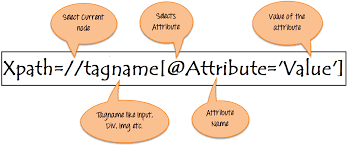

Let's see this in action on a simple page.  [DuckDuckGo](https://duckduckgo.com/) is a search engine.  We see that it has a box for entering a search. The entry box is called a 'form' with id 'search_form_homepage'  I can get selenium to this by using `Xpath=//input[@id="search_form_input_homepage"]`

In [24]:
url2 = "https://duckduckgo.com"

driver.get(url2)

elem = driver.find_element(By.XPATH,'//input[@id="search_form_input_homepage"]' )

I can also get to the icon that makes it search on a path `input[@id="search_button_homepage"]`

## Other Selenium Commands

We used the `click()` command above.  I think that is really cool to see the driver interacting with the web page!  Let's show you a few others that are nice.

`send_keys` will allow you to send information to the element you have selected!  You can use this to send text or even hit certain keys on your keyboard.  The one we'll need is `Keys.ENTER` this hits the carriage return (yes I am that old that I still call it that!)  Let me search for myself.

In [25]:
from selenium.webdriver.common.keys import Keys #this did take another part of selenium not yet loaded!

elem.send_keys('Nicholas Jacob')
elem.send_keys(Keys.ENTER)

So where did this get me?

In [26]:
driver.current_url

'https://duckduckgo.com/?q=Nicholas+Jacob&t=h_&ia=web'

What is here?

In [45]:
soup = BeautifulSoup(driver.page_source)

for i in soup.find_all('a', class_="result__check"):
  print(i['href'])

https://www.kinopoisk.ru/name/2801548/
https://www.imdb.com/name/nm4966502/
https://www.facebook.com/nicholas.jacob1
https://ru.kinorium.com/name/2727104/
https://en.wikipedia.org/wiki/Stoneman_Douglas_High_School_shooting
https://www.film.ru/person/nicholas-jacob
https://www.tumblr.com/tagged/nicholas-jacob
https://www.youtube.com/watch?v=AwJj9D9neUo
https://www.wikitree.com/wiki/Jacob-2
https://www.listal.com/nicholas-jacob


You can also navigate the page with 
1. refresh(), back, forward
4. scroll()

If you need to!

## Your Turn

Use python to browse to google.  Search for something of interest and go to the first link by clicking I am feeling lucky.  Return the html from that first page.